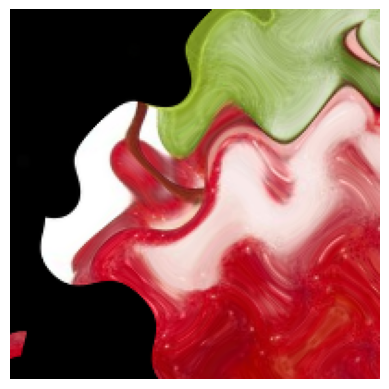

 Đã lưu ảnh kết quả: tao_warped.jpg


In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import rotate, map_coordinates

# === Bước 1: Đọc ảnh quả táo ===
img = iio.imread("tao.jpg")

# === Bước 2: Chọn vùng (bạn có thể thay đổi tọa độ tại đây) ===
# Ví dụ chọn vùng quả táo nằm trong box [Y1:Y2, X1:X2]
y1, y2 = 100, 300
x1, x2 = 150, 350
apple = img[y1:y2, x1:x2]

# === Bước 3: Tịnh tiến (dx, dy) ===
dx, dy = 30, 40
M = np.float32([[1, 0, dx], [0, 1, dy]])
translated = cv2.warpAffine(apple, M, (apple.shape[1], apple.shape[0]))

# === Bước 4: Xoay 45 độ (giữ kích thước)
rotated = rotate(translated, angle=45, reshape=False, mode='reflect')
rotated = np.clip(rotated, 0, 255).astype(np.uint8)

# === Bước 5: Hiệu ứng sóng
def wave_transform(image, amplitude=20):
    h, w = image.shape[:2]
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    X_new = X + amplitude * np.sin(2 * np.pi * Y / 60)
    Y_new = Y + amplitude * np.cos(2 * np.pi * X / 60)

    warped = np.zeros_like(image)
    for i in range(3):
        warped[:, :, i] = map_coordinates(image[:, :, i], [Y_new, X_new], order=1, mode='reflect')
    return warped

warped = wave_transform(rotated, amplitude=15)

# === Bước 6: Hiển thị và lưu ảnh kết quả
plt.imshow(warped)
plt.axis('off')
plt.show()

iio.imwrite("tao_warped.jpg", warped)
print(" Đã lưu ảnh kết quả: tao_warped.jpg")


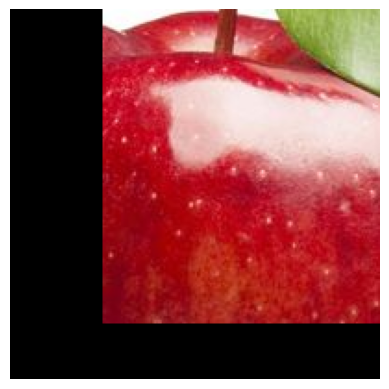

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2

# Đọc ảnh gốc
img = iio.imread("tao.jpg")

# Chọn vùng quả táo (toạ độ có thể tùy chỉnh nếu cần)
y1, y2 = 100, 300
x1, x2 = 150, 350
apple = img[y1:y2, x1:x2]

# Tịnh tiến với dx=50 (sang phải), dy=-30 (lên trên)
dx, dy = 50, -30
M = np.float32([[1, 0, dx], [0, 1, dy]])
translated = cv2.warpAffine(apple, M, (apple.shape[1], apple.shape[0]))

# Hiển thị kết quả
plt.imshow(translated)
plt.axis('off')
plt.show()

# Lưu kết quả nếu muốn
iio.imwrite("tao_translated_50_-30.jpg", translated)


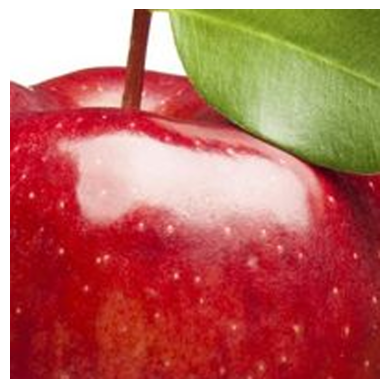

In [6]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import cv2

# Đọc ảnh gốc
img = iio.imread("tao.jpg")

# Chọn vùng quả táo (có thể thay đổi toạ độ nếu cần)
y1, y2 = 100, 300
x1, x2 = 150, 350
apple = img[y1:y2, x1:x2]

# Phóng to gấp 3 lần
apple_zoomed = cv2.resize(apple, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

# Hiển thị ảnh sau khi phóng
plt.imshow(apple_zoomed)
plt.axis('off')
plt.show()

# Lưu kết quả nếu muốn
iio.imwrite("tao_zoom3x.jpg", apple_zoomed)


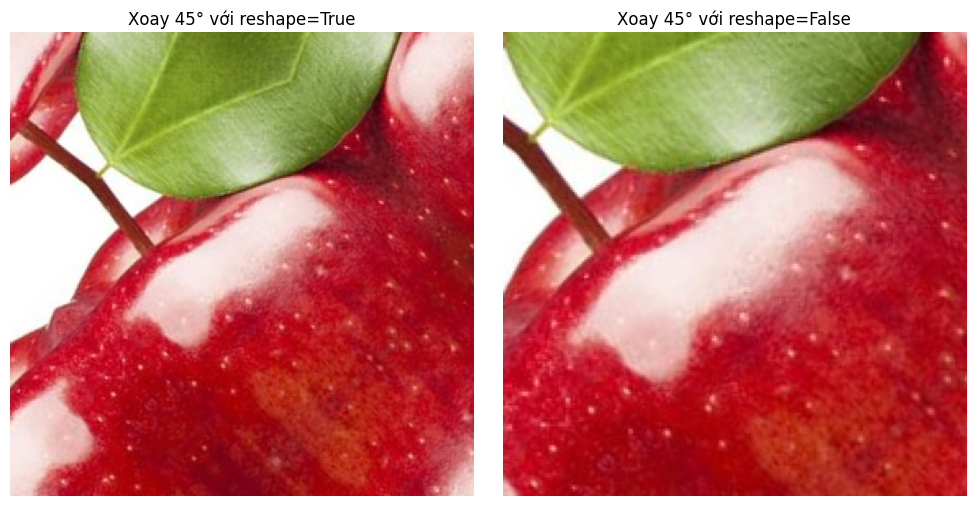

In [7]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Đọc ảnh gốc
img = iio.imread("tao.jpg")

# Chọn vùng quả táo (có thể điều chỉnh nếu cần)
y1, y2 = 100, 300
x1, x2 = 150, 350
apple = img[y1:y2, x1:x2]

# Xoay 45 độ - reshape=True (giữ toàn bộ)
rotated_true = rotate(apple, angle=45, reshape=True, mode='reflect')
rotated_true = np.clip(rotated_true, 0, 255).astype(np.uint8)

# Xoay 45 độ - reshape=False (giữ kích thước cũ)
rotated_false = rotate(apple, angle=45, reshape=False, mode='reflect')
rotated_false = np.clip(rotated_false, 0, 255).astype(np.uint8)

# Hiển thị hai ảnh cạnh nhau
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(rotated_true)
axs[0].set_title("Xoay 45° với reshape=True")
axs[0].axis('off')

axs[1].imshow(rotated_false)
axs[1].set_title("Xoay 45° với reshape=False")
axs[1].axis('off')

plt.tight_layout()
plt.show()


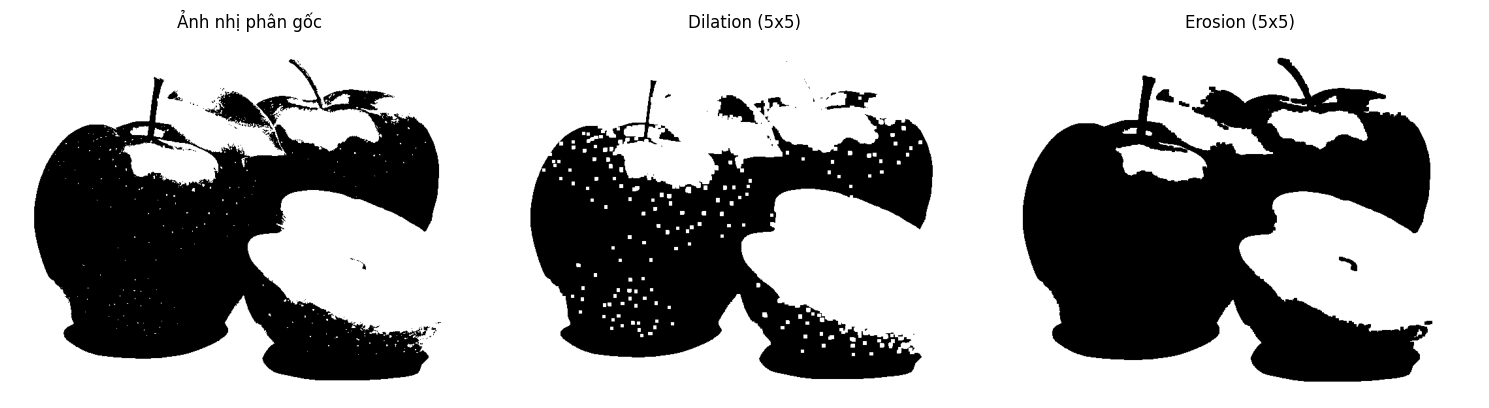

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio

# Đọc ảnh gốc (nên là ảnh đen trắng hoặc đã nhị phân hóa)
img = iio.imread("tao.jpg")  # thay bằng ảnh bạn cần
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Tạo kernel kích thước (5,5)
kernel = np.ones((5, 5), np.uint8)

# Dilation và Erosion
dilated = cv2.dilate(binary, kernel, iterations=1)
eroded = cv2.erode(binary, kernel, iterations=1)

# Hiển thị kết quả
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(binary, cmap='gray')
axs[0].set_title("Ảnh nhị phân gốc")
axs[0].axis('off')

axs[1].imshow(dilated, cmap='gray')
axs[1].set_title("Dilation (5x5)")
axs[1].axis('off')

axs[2].imshow(eroded, cmap='gray')
axs[2].set_title("Erosion (5x5)")
axs[2].axis('off')

plt.tight_layout()
plt.show()
